In [1]:
%matplotlib inline

import numpy as np
from numpy import exp, sqrt, sin, cos
from numpy import radians as rad
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
import scipy.special as sp
import capLib
import os
#plt.ion()
plt.close("all")

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


267.0


In [2]:
v_g = np.array([0., 220.,0.]) # galactic rotational velocity
v_s = np.array([-9., 12., 7.]) # Sun proper motion
beta = np.array([rad(174.4697), rad(59.575), rad(29.812)]) # degrees->denotes eliptic lat
epsilon1 = np.array([0.9931, 0.1170,-0.01032])
epsilon2 = np.array([-0.067, 0.4927,-0.8676])
T = np.array([76.1, 156.3, 352.4]) # phases in days

In [3]:
u_e = 29.79 # km/s fornengo 
e = 0.016722
lambda0 = rad(13.) # degrees
w = 2. * np.pi / 365.
v_0 = 220.
sigma = sqrt(3* (v_0**2) / 2)
v_min = 0
v_max = 650
sigma_x = sigma
sigma_y = sigma
sigma_z = sigma

In [4]:
def v_EARTH(t):
                X = (2*np.pi/365.)*(t-80)
                v_eliptic = u_e*((epsilon1*cos(X))+(epsilon2*sin(X)))
                v = v_g + v_s + v_eliptic
                modulus = sqrt(v[0]**2 + v[1]**2 + v[2]**2) 
                return v, modulus
            
#global value CAREFULL!!!!
#v_e,_ = v_EARTH(152)
#print v_e

Gaussian distribution: $$f_{gaussian}(v_i)=N \exp{-\frac{v_i^2}{2\sigma_i}}$$

In [5]:
def gaussian(v, sigma):
                return exp(-(v**2)/(2. * sigma**2))




$$F_{3Ddpherical}=f_{gaussian}(v_x)\,\,f_{gaussian}(v_y)\,\,f_{gaussian}(v_y)$$

In [6]:
def f_3d_sph(v,theta, phi):
    vx = v * sin(theta) * cos(phi)
    vy = v * sin(theta) * sin(phi)
    vz = v * cos(theta)
    N = 1. / sqrt(8. * np.pi**3 * sigma_x**2 * sigma_y**2 * sigma_z**2)
    return N * gaussian(vx, sigma_x) * gaussian(vy, sigma_y) * gaussian(vz, sigma_z)

def Normalization(v,theta,phi):
    return f_3d_sph(v,theta, phi) * v**2 *sin(theta)
    
myNor = integrate.nquad(Normalization,[[v_min,v_max],[0,np.pi],[0,2*np.pi]])[0]
  

In [7]:
v_earth, _ = v_EARTH(1)


def I(t):
    v_e,_ = v_EARTH(t)
    
    def integrand(v, theta, phi,v_e):
        vvec = np.array([v * sin(theta) * cos(phi), v * sin(theta) * sin(phi), v * cos(theta)])
        vsum = norm(vvec + v_e)
        return f_3d_sph(vsum, theta, phi) * v * sin(theta)
    
    result = integrate.nquad(integrand,[[v_min,v_max],[0,np.pi],[0,2*np.pi]],args=(v_e,))
    return myNor * result[0]



when t=1
run number: 1 with vmin : 0
_______________________________________


KeyboardInterrupt: 

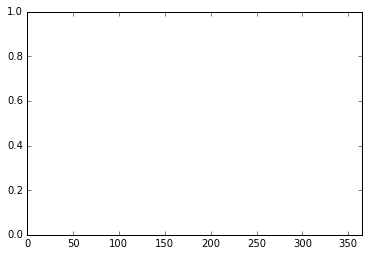

In [9]:
cont = 0
#time = np.array([i for i in np.arange(1,365,50)])
time = np.array([1,25, 50,75, 100,125,152,175,200,225,250,300,315, 330,347, 364])
fig ,ax = plt.subplots()
ax.set_xlim([0,365])
for v_min in (0, 200, 400.,800, 1800.):
        cont += 1
        print "when t=1"
        print "run number:",cont, "with vmin :", v_min
        print '_______________________________________'
        array = np.array(map(I, time))
        base = array[0]
        array2 = np.divide(array,base)
        print array, array2
        ax.plot(time, array2, 'b--', linewidth=2.0)
        
plt.show()

In [8]:
sigma_x = 42
sigma_y = 208
sigma_z = 166

when t=1
run number: 1 with vmin : 0
_______________________________________


KeyboardInterrupt: 

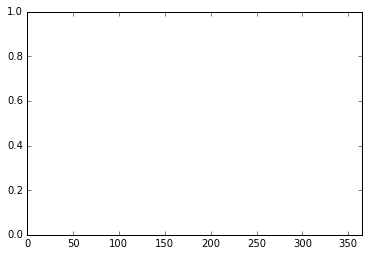

In [11]:
cont = 0
#time = np.array([i for i in np.arange(1,365,50)])
time = np.array([i for i in range(1,375,20)])
fig ,ax = plt.subplots()
ax.set_xlim([0,365])
for v_min in (0, 100, 200, 400.):
        cont += 1
        print "when t=1"
        print "run number:",cont, "with vmin :", v_min
        print '_______________________________________'
        array = np.array(map(I, time))
        base = array[0]
        array2 = np.divide(array,base)
        print array, array2
        ax.plot(time, array2, 'b--', linewidth=2.0)
        
plt.show()

In [8]:
sigma_x = 257
sigma_y = 26
sigma_z = 77

In [9]:
def get_array(filename):
    file = open(filename)
    array = np.zeros(100)
    for ln in file:
        row = ln.split(' ')
        if row[0]=='\n' or row[0]=='#':
            continue
        index=int(float(row[0]))
        vals=[2,4,6,8,10]
        cont=0
        for i in range(0, len(row)):
            if len(row[i])<4:
                continue
            if row[i][-1]==']':
                array[5*index+cont]= row[i][0:-1]
            else:
                array[5*index+cont]= row[i]
            cont +=1
    return np.array(array)    
    
step=364. / 99.
# get local section of time array for each core
global_time = np.arange(1, 365 + step, step)


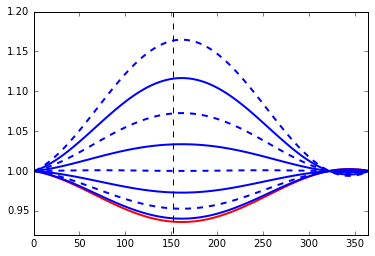

In [10]:
def get_plot(path,ax):
    file_list = os.listdir(path)
    for fn in file_list:
        #print fn
        if fn[0]=='o':
            if fn[3]=='0':
                line = 'r-'
            elif fn[4] =='5' or fn[3]=='5':
                line = 'b-'
            else:
                line = 'b--'
            Iv_min = get_array(path+'/'+fn)
            Iv_mint1 = Iv_min[0]
            if fn[3]=='5':
                aux = Iv_min
                Iv_min[65] = (Iv_min[64]+Iv_min[66])/2
            ax.plot(global_time, Iv_min/Iv_mint1, line, linewidth=2.0)
    plt.plot((152.,152.), (-215., 250.), 'k--')
    return 
fig ,ax = plt.subplots()
ax.set_xlim([0,365])
ax.set_ylim([0.92,1.20])
get_plot('data0/out/',ax)       



out0269.44.txt
out100269.44.txt
out150269.44.txt
out200269.44.txt
out250269.44.txt
out300269.44.txt
out350269.44.txt
out400269.44.txt
out50269.44.txt


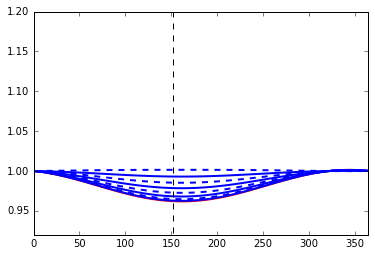

In [111]:
fig ,ax = plt.subplots()
ax.set_xlim([0,365])
ax.set_ylim([0.92,1.20])
get_plot('data269.44/out',ax)

to achieve this i did

$$I(v_{min}, t)= \int_{v_min}^{v_esc} N\,\, \frac{f(v_x)f(v_y)f(v_y)}{\sqrt(v_x^2+v_y^2+v_z^2)}d\vec{v}$$
with $$f(v_i)=N \exp{-\frac{v_i^2}{2\sigma_i}}$$

but in spherical coordinates i. e. $v, \theta, \phi$ so the integral becomes:
$$I(v_{min}, t)= N\int_{0}^{2\pi}\int_{0}^{\pi}\int_{v_min}^{v_esc} f(v) v sin(\theta) dv d\theta d\phi$$

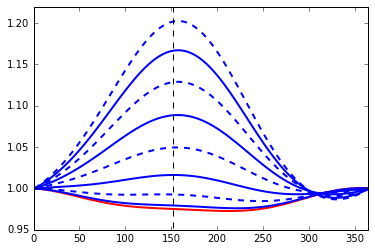

In [11]:
fig ,ax = plt.subplots()
ax.set_xlim([0,365])
ax.set_ylim([0.95,1.22])
get_plot('data42/out/', ax)

no we try to achieve the same result from discrete functions


In [12]:
import fdulib as vdf
import datetime
def my_gaussian(v, sigma):
                return exp(-(v**2)/(2. * sigma**2))/ sqrt(2 * np.pi * sigma**2)

v_min=0


def get_disc_fun(n_bins, sigma, histogram=False):
    """ 
    gets a discrete fdu in the sun frame of reference
    from de selected function
    and with a defined number of bins n_bins
    """
    bins = []
    hist = []
    prob = []
    tmp = []
    starts, finish =  -1000, 1000
    width = (finish - starts)/n_bins
    for i in np.arange(starts,finish,1):
             if i % width == 0:
                     bins.append(i)
                     tmp.append(my_gaussian(i, sigma))
    a = sum(tmp)
    prob = [x / a  for x in tmp]
    if histogram == False:
            return bins, prob
    else:
            hist = [x / (a * width)  for x in tmp]
            return bins, prob, hist

def get_sample(samp_num, bin_num, sigma, plot=False):

    bins, prob, hist_dat = get_disc_fun(bin_num, sigma, histogram = True)
    bin_size = int(float(bins[-1]) / len(bins) + 0.5)
    bin_half =float(bin_size)/2. 
    np.random.seed(int(str(datetime.datetime.now())[-1]))
    data = np.random.choice(bins, samp_num, p=prob) # sample data 
    #line  = plt.hist(data, bins=bins, normed=1, alpha=0.5);
    if plot ==False:
        return data
    else:
        line  = np.histogram(data, bins=bins, normed=1)
        values = np.delete(line[1], -1) 
        normalization = 1#sum(line[0]) * bin_size
        values2 = [x / normalization for x in line[0]]
        bins = values
        hist = values2
        fig ,ax = plt.subplots()
        ax.plot(bins, hist)
        return data,np.array(bins), np.array(hist)
    
def get_normal(samp_num, bin_num, sigma, plot=False):

    bins, prob, hist_dat = get_disc_fun(bin_num, sigma, histogram = True)
    bin_size = int(float(bins[-1]) / len(bins) + 0.5)
    bin_half =float(bin_size)/2. 
    np.random.seed(int(str(datetime.datetime.now())[-1]))
    data = np.random.normal(0,sigma,samp_num ) # sample data 
    #line  = plt.hist(data, bins=bins, normed=1, alpha=0.5);
    if plot ==False:
        return data
    else:
        line  = np.histogram(data, bins=bins, normed=1)
        values = np.delete(line[1], -1) 
        normalization = 1#sum(line[0]) * bin_size
        values2 = [x / normalization for x in line[0]]
        bins = values
        hist = values2
        fig ,ax = plt.subplots()
        ax.plot(bins, hist)
        return data,np.array(bins), np.array(hist)
    
vx, v,distvx = get_sample(10000, 100, v_0/sqrt(2), plot=True)
vx2, v2,distvx2 = get_normal(10000, 100, v_0/sqrt(2), plot=True)
print len(v)

99


In [13]:
v_e, _ = v_EARTH(1)
fig ,ax = plt.subplots()
ax.set_xlim([0,1000])
#ax.set_ylim([0,0.6])
fdu = v*np.array(distvx)
fdu_e = v*np.array(distvx + v_e[0])
ax.plot(v, fdu)

plt.title('fdu', fontsize=20)


In [14]:

def heavyside(val):
    if val< v_min:
        return 0.
    else:
        return 1.

samp_size = 100    

def get_vlists(samp_size):   
    # in terms of v_0 (this works!!)
    v_x = np.random.normal(0,v_0/sqrt(2),samp_size)
    v_y = np.random.normal(0,v_0/sqrt(2),samp_size)
    v_z = np.random.normal(0,v_0/sqrt(2),samp_size)
    return v_x,v_y,v_z

v_x,v_y,v_z = get_vlists(samp_size)

def I_sampled(t):
    """
    vx, vy, vz are array objects
    and global variables
    """
    v_earth, _ = v_EARTH(t)
    listv = sqrt((v_x+v_earth[0])**2 + (v_y+ v_earth[1])**2 + (v_z +v_earth[2])**2)
    nulist=map(heavyside,listv)
    result = sum(nulist / listv)
    return result

I_s = np.vectorize(I_sampled)




In [15]:
samp_size = 26000
v_x,v_y,v_z = get_vlists(samp_size)
time_arr = [i for i in range(0,370,5)]

v_min=0
i000= np.array(I_s(time_arr))
nor000 = (i000[0]+i000[1]+i000[2])/3

v_min=200
i200= np.array(I_s(time_arr))
nor200 = (i200[0]+i200[1]+i200[2])/3


v_min=400
i400= np.array(I_s(time_arr))
nor400 = (i400[0]+i400[1]+i400[2])/3

### fig format
fig ,ax = plt.subplots()
ax.set_ylim([0.90,1.20])
ax.text(225, 1.17,'sample size '+str(samp_size),fontsize=14)
### plots
get_plot('data0/simple/',ax)
ax.plot(time_arr, i000/nor000,'r-')
ax.plot(time_arr,  i200/nor200, 'b--')
ax.plot(time_arr,  i400/nor400, 'b-')




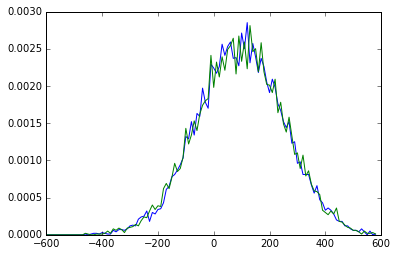

In [100]:


def get_distribution(mymu,mysigma, case=True):
    bin_array = np.arange(-600,600,10)
    samp_size = 10000
    np.random.seed(int(str(datetime.datetime.now())[-1]))
    if case==True:
        data = np.random.normal(0,mysigma,samp_size ) # sample data #line  = plt.hist(data, bins=bins, normed=1, alpha=0.5);      
        line  = np.histogram(data+ mymu, bins=bin_array, normed=1)
    else:
        data = np.random.normal(mymu,mysigma,samp_size ) # sample data #line  = plt.hist(data, bins=bins, normed=1, alpha=0.5);      
        line  = np.histogram(data, bins=bin_array, normed=1)
    bins = np.delete(line[1], -1) 
    normalization = 1#sum(line[0]) * bin_size
    hist= [x / normalization for x in line[0]]
    return bins, hist


x , y =  get_distribution(100,v_0/sqrt(2),case=False)
x2s, y2s = get_distribution(100,v_0/sqrt(2))
#x2s, y2s = get_distribution(0,sigma/sqrt(3))
fig ,ax = plt.subplots()
ax.plot(x, y)
ax.plot(x2s, y2s, 'g-')



out042..txt
out10042..txt
out15042..txt
out20042..txt
out25042..txt
out30042..txt
out35042..txt
out40042..txt
out5042..txt


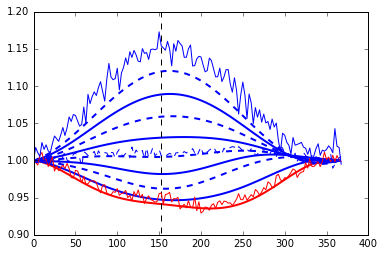

In [135]:
sigma_x = 42.
sigma_y = 208.
sigma_z = 166.

samp_size = 26000      
#v_x,v_y,v_z = get_vlists(samp_size)
#factor_V = sqrt(np.pi)*v_0
#print factor_V
#v_x = np.random.normal(0, v_0/sqrt(2) , samp_size)
#v_y = np.random.normal(0, v_0/sqrt(2), samp_size)
#v_z = np.random.normal(0, v_0/sqrt(2) , samp_size)
#print type(v_x)


def I_sampledV2(t):
    """
    vx, vy, vz are array objects
    and global variables
    """
    v_earth, _ = v_EARTH(t)
    vx = np.random.normal(v_earth[0],sigma_x,samp_size)
    vy = np.random.normal(v_earth[1],sigma_y,samp_size)
    vz = np.random.normal(v_earth[2],sigma_z,samp_size)
    
    listv = sqrt((vx)**2 + (vy)**2 + (vz)**2)
    nulist=map(heavyside,listv)
    result = sum(nulist / listv)
    return result

I_s = np.vectorize(I_sampledV2)



time_arr =np.arange(0,370,2.5)

v_min=0
i000= np.array(I_s(time_arr))
nor000 = (i000[0])#+i000[1]+i000[2])/3

v_min=200
i200= np.array(I_s(time_arr))
nor200 = (i200[0])#+i200[1]+i200[2])/3


v_min=400
i400= np.array(I_s(time_arr))
nor400 = (i400[0])# +i400[1]+i400[2])/3

### fig format
fig ,ax = plt.subplots()
ax.set_ylim([0.90,1.20])
#ax.text(225, 1.17,'sample size '+str(samp_size),fontsize=14)
### plots
get_plot('data42./out/',ax)
ax.plot(time_arr, i000/nor000,'r-')
ax.plot(time_arr,  i200/nor200, 'b--')
ax.plot(time_arr,  i400/nor400, 'b-')

In [149]:
sigma_x = 256.
sigma_y = 26.
sigma_z = 77.


time_arr = [i for i in range(0,370,5)]

v_min=0
i000= np.array(I_s(time_arr))
nor000 = (i000[0]+i000[1]+i000[2])/3

v_min=200
i200= np.array(I_s(time_arr))
nor200 = (i200[0]+i200[1]+i200[2])/3

v_min=210
i210= np.array(I_s(time_arr))
nor210 = (i210[0]+i210[1]+i210[2])/3

v_min=220
i220= np.array(I_s(time_arr))
nor220 = (i220[0]+i220[1]+i220[2])/3

v_min=240
i240= np.array(I_s(time_arr))
nor240 = (i240[0] +i240[1]+i240[2])/3

v_min=250
i250= np.array(I_s(time_arr))
nor250 = (i250[0] +i250[1]+i250[2])/3

### fig format
fig ,ax = plt.subplots()
ax.set_ylim([0.90,1.20])
#ax.text(225, 1.17,'sample size '+str(samp_size),fontsize=14)
### plots
get_plot('data/simple/',ax)
ax.plot(time_arr, i000/nor000,'r-')
ax.plot(time_arr,  i200/nor200, 'b--')
ax.plot(time_arr,  i210/nor210, 'b-')
ax.plot(time_arr,  i220/nor220, 'b-')

ax.plot(time_arr,  i240/nor240, 'b-')

ax.plot(time_arr,  i250/nor250, 'b-', linewidth= 2.)

OSError: [Errno 2] No such file or directory: 'data/simple/'

[ 8 27]
